# Importação Das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [2]:
def describe_dist_var(dataframe_1,dataframe_2,var):
    distancias_var = {}
        
    for periodo in range(52):
        aux = []
        for list_1 in dataframe_1[var]:
            for list_2 in dataframe_2[var]:
                aux.append(math.fabs(list_1[periodo]-list_2[periodo]))
        distancias_var[f'x{periodo+1}'] = aux

    return pd.DataFrame(distancias_var)

In [3]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(52):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [4]:
def describe_var_grafico(describe1_var,describe2_var,describe3_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe1_var.iloc[1,:],color='blue',label='Neural Prophet')
    plt.plot(range(52),describe2_var.iloc[1,:],color='red',label='Sarimax')
    plt.plot(range(52),describe3_var.iloc[1,:],color='green',label='Demanda Passadas')

    plt.xlabel(var)
    plt.ylabel('Valor Médio')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}Medio.png', format='png')
    plt.show()


In [5]:
def describe_var_desv_grafico(describe1_var,describe2_var,describe3_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe1_var.iloc[2,:],color='blue',label='Neural Prophet')
    plt.plot(range(52),describe2_var.iloc[2,:],color='red',label='Sarimax')
    plt.plot(range(52),describe3_var.iloc[2,:],color='green',label='Demanda Passadas')

    plt.xlabel(var)
    plt.ylabel('Desvio Padrão')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}FrdvioPadrao.png', format='png')
    plt.show()

In [6]:
def plot_dist(describe_dist_var,var):
    fig=plt.figure(figsize=(6,3))

    plt.plot(range(52),describe_dist_var.iloc[1,:])
    plt.xlabel(var)
    plt.ylabel('Distância Média')
    plt.legend()
    plt.tight_layout()
    #plt.savefig(f'Imgs\{var}DistMedia.png', format='png')
    plt.show()

# Importação Dos Dados

In [7]:
resultados_1 = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_np.csv").iloc[:,1:]
resultados_2 = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_sar.csv").iloc[:,1:]
resultados_3 = pd.read_csv("C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Resultados_pi/resultados_pi_treino.csv").iloc[:,1:]

In [8]:
resultados_dataframe_1 = {}
for column in range(len(resultados_1.columns[:-5])):
    coluna_aux = []
    for element in range(len(resultados_1)):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_1.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_1[resultados_1.columns[column]] = coluna_aux


for column in resultados_1.columns[3:]:
    resultados_dataframe_1[column] = resultados_1[column]


resultados_dataframe_1 = pd.DataFrame(resultados_dataframe_1)

In [9]:
resultados_dataframe_1

,x,s,y,ObjVal,ObjBound,RunTime,NodeCount,Status
0,"[9877.404296875, 9904.2919921875, 9926.2109375...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.040950e+07,1.040950e+07,0.005,1.0,1
1,"[9904.1240234375, 9921.4599609375, 9949.382812...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.041034e+07,1.041034e+07,0.006,1.0,1
2,"[9865.751953125, 9890.9169921875, 9911.578125,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.035495e+07,1.035495e+07,0.005,1.0,1


In [10]:
resultados_dataframe_2 = {}
for column in range(len(resultados_2)):
    coluna_aux = []
    for element in range(len((resultados_2.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_2.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_2[resultados_2.columns[column]] = coluna_aux

for column in resultados_2.columns[3:]:
    resultados_dataframe_2[column] = resultados_2[column]

resultados_dataframe_2 = pd.DataFrame(resultados_dataframe_2)

In [11]:
resultados_dataframe_2

,x,s,y,ObjVal,ObjBound,RunTime,NodeCount,Status
0,"[9805.050949590328, 9910.373601066494, 9958.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.037838e+07,1.037838e+07,0.007,1.0,1
1,"[9805.050949590328, 9910.373601066494, 9958.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.037838e+07,1.037838e+07,0.005,1.0,1
2,"[9925.6957472608, 9920.938361816821, 9873.0590...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.040665e+07,1.040665e+07,0.005,1.0,1


In [12]:
resultados_dataframe_3 = {}
for column in range(len(resultados_3.columns[:-5])):
    coluna_aux = []
    for element in range(len(resultados_3)):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_3.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_3[resultados_3.columns[column]] = coluna_aux

for column in resultados_3.columns[3:]:
    resultados_dataframe_3[column] = resultados_3[column]

resultados_dataframe_3 = pd.DataFrame(resultados_dataframe_3)

In [13]:
resultados_dataframe_3

,x,s,y,ObjVal,ObjBound,RunTime,NodeCount,Status
0,"[9845.475278766691, 9801.974418448768, 9815.38...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.039945e+07,1.039945e+07,0.005,1.0,1
1,"[9823.497736860416, 9762.048208799595, 9808.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.040822e+07,1.040822e+07,0.005,1.0,1
2,"[9803.978873270837, 9824.717619966605, 9905.88...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.040302e+07,1.040302e+07,0.005,1.0,1
3,"[9814.310256408413, 9857.843217548549, 9903.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.039622e+07,1.039622e+07,0.005,1.0,1


# Analise Dos Resultados

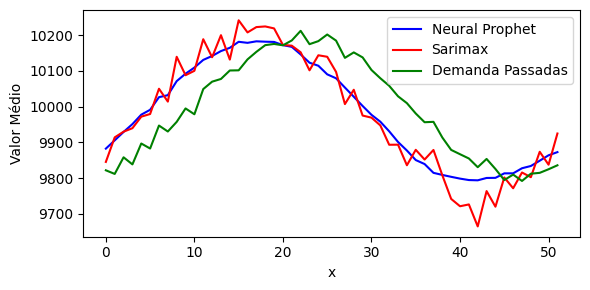

In [14]:
describe1_x = describe_var(resultados_dataframe_1,'x').describe()
describe2_x = describe_var(resultados_dataframe_2,'x').describe()
describe3_x = describe_var(resultados_dataframe_3,'x').describe()

describe_var_grafico(describe1_x,describe2_x,describe3_x,'x')

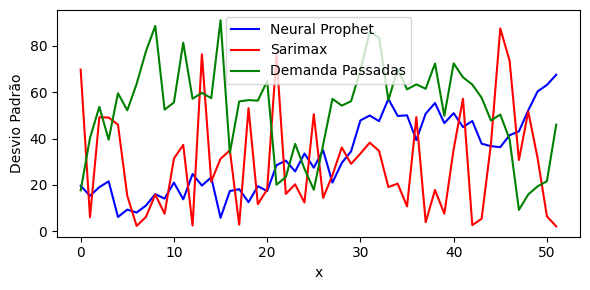

In [15]:
describe_var_desv_grafico(describe1_x,describe2_x,describe3_x,'x')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


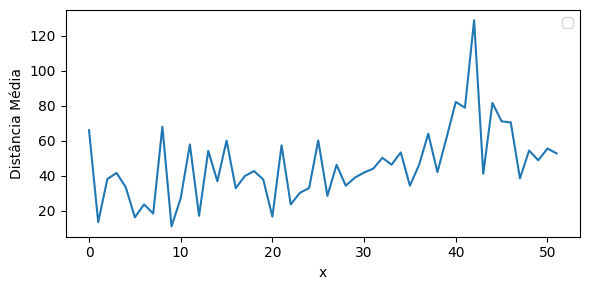

In [16]:
describe_x_1 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_2,'x').describe()
plot_dist(describe_x_1,'x') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


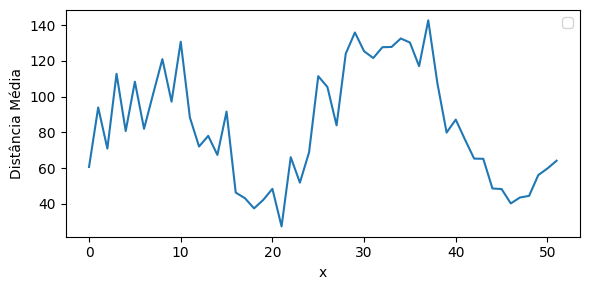

In [17]:
describe_x_2 = describe_dist_var(resultados_dataframe_1,resultados_dataframe_3,'x').describe()
plot_dist(describe_x_2,'x') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


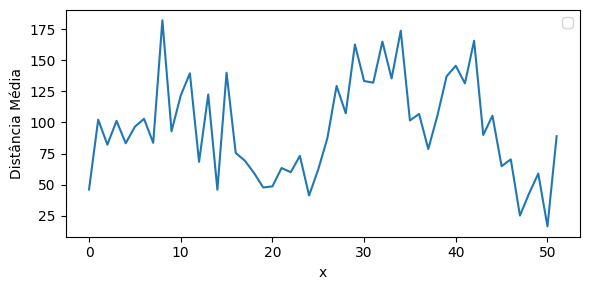

In [18]:
describe_x_3 = describe_dist_var(resultados_dataframe_2,resultados_dataframe_3,'x').describe()
plot_dist(describe_x_3,'x') 

In [19]:
df_objVal = pd.DataFrame({'ObjVal':list(resultados_dataframe_1['ObjVal'].values)+list(resultados_dataframe_2['ObjVal'].values)+list(resultados_dataframe_3['ObjVal'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_1))]+['Sarimax' for i in range(len(resultados_2))]+['Demandas Passadas' for i in range(len(resultados_3))]
             })

In [20]:
df_objVal

,ObjVal,Alg
0,1.040950e+07,Neural Prophet
1,1.041034e+07,Neural Prophet
2,1.035495e+07,Neural Prophet
3,1.037838e+07,Sarimax
4,1.037838e+07,Sarimax
5,1.040665e+07,Sarimax
6,1.039945e+07,Demandas Passadas
7,1.040822e+07,Demandas Passadas
8,1.040302e+07,Demandas Passadas
9,1.039622e+07,Demandas Passadas


[]

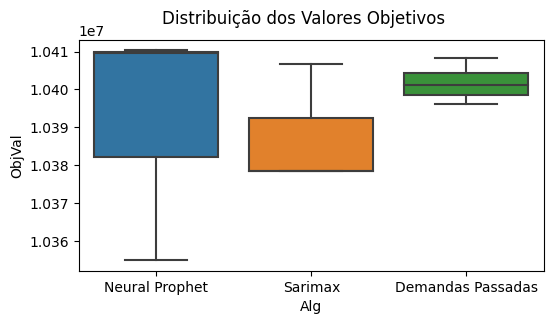

In [21]:
fig=plt.figure(figsize=(6,3))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.boxplot(df_objVal, x='Alg',y='ObjVal')
plt.plot()

In [22]:
df_RunTime = pd.DataFrame({'RunTime':list(resultados_dataframe_1['RunTime'].values)+list(resultados_dataframe_2['RunTime'].values)+list(resultados_dataframe_3['RunTime'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_1))]+['Sarimax' for i in range(len(resultados_2))]+['Demandas Passadas' for i in range(len(resultados_3))]
             })

[]

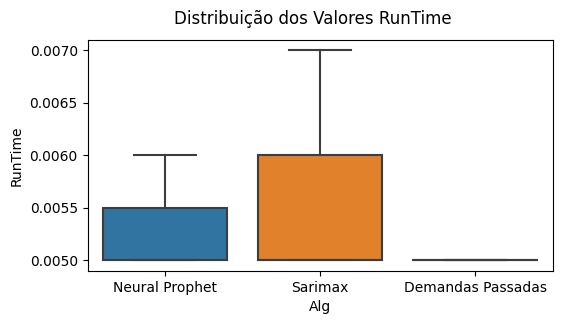

In [23]:
fig=plt.figure(figsize=(6,3))
fig.suptitle('Distribuição dos Valores RunTime')

sns.boxplot(df_RunTime, x='Alg',y='RunTime')
plt.plot()

In [24]:
df_ObjBound = pd.DataFrame({'ObjBound':list(resultados_dataframe_1['ObjBound'].values)+list(resultados_dataframe_2['ObjBound'].values)+list(resultados_dataframe_3['ObjBound'].values),
             'Alg': ['Neural Prophet' for i in range(len(resultados_1))]+['Sarimax' for i in range(len(resultados_2))]+['Demandas Passadas' for i in range(len(resultados_3))]
             })

[]

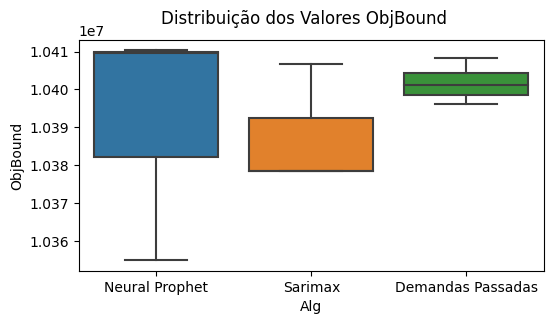

In [25]:
fig=plt.figure(figsize=(6,3))
fig.suptitle('Distribuição dos Valores ObjBound')

sns.boxplot(df_ObjBound, x='Alg',y='ObjBound')
plt.plot()